In [14]:
import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
conn = mysql.connector.connect(user='root', password=, database='gingko', use_unicode=True)
cursor = conn.cursor()
cursor.execute('select count(*) from web_pages')

In [3]:
values = cursor.fetchall()

In [4]:
values

[(94,)]

In [5]:
from counter import get_img_number, get_ads_number

In [6]:
cursor.execute('select site, is_fake, html from web_pages')
webs = cursor.fetchall()

In [7]:
len(webs)

94

In [11]:
imgs = [[], []]
ads = [[], []]
for w in webs:
    imgs[w[1]].append(get_img_number(w[2]))
    ads[w[1]].append(get_ads_number(w[2]))

(array([23.,  9.,  6.,  2.,  1.,  1.,  2.,  1.,  0.,  5.]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <a list of 10 Patch objects>)

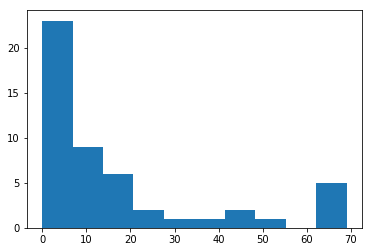

In [15]:
plt.hist(imgs[0])

(array([36.,  3.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([  0. ,  83.8, 167.6, 251.4, 335.2, 419. , 502.8, 586.6, 670.4,
        754.2, 838. ]),
 <a list of 10 Patch objects>)

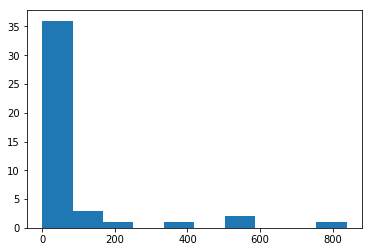

In [16]:
plt.hist(imgs[1])

(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

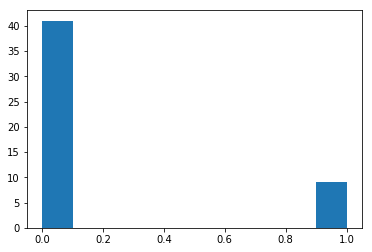

In [17]:
plt.hist(ads[0])

(array([36.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  3.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

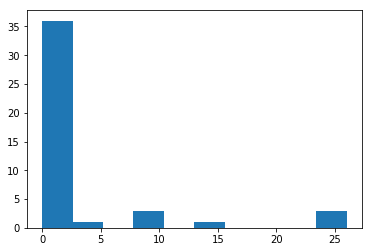

In [18]:
plt.hist(ads[1])